In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Задание
#### Итак, папка descriptive_statistics.
#### Внутри увидите пустой Jupyter Notebook и файл clients.csv В файле предоставленна информация о клиентах риэлторской компании США за один месяц. Вам необходимо как специалисту по Дата Сайнс сделать следующее:
#### Используя данные о выборке, постройте типичный портрет целевого клиента компании (пол, возраст, какой тип квартиры он приобретает, какова площадь в кв. м , каков средний чек, цель покупки,источник лида (погуглите что такое лид в маркетинге, за это отвечает колонка Source).
#### Таким образом после вашего анализа, я хочу увидеть небольшое описание нашего целевого клиента с соответствующими визуализациями, что мы прошли с вами на лекции.

In [79]:
clients_df = pd.read_csv(r"clients.csv")

In [80]:
clients_df.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


In [182]:
clients_df['Price'] = clients_df['Price'].str.replace("$", "")
clients_df['Price'] = clients_df['Price'].str.replace(",", "").astype(float)

<ipython-input-182-85dfbc247dac>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clients_df['Price'] = clients_df['Price'].str.replace("$", "")


In [184]:
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       195 non-null    int64  
 1   Building                 195 non-null    int64  
 2   Year of sale             195 non-null    int64  
 3   Month of sale            195 non-null    int64  
 4   Type of property         195 non-null    object 
 5   Property number          195 non-null    int64  
 6   Area (ft.)               195 non-null    float64
 7   Price                    195 non-null    float64
 8   Status                   195 non-null    object 
 9   Customer ID              195 non-null    object 
 10  Entity                   195 non-null    object 
 11  Name                     195 non-null    object 
 12  Surname                  195 non-null    object 
 13  Age at time of purchase  178 non-null    float64
 14  Age Interval             1

In [185]:
clients_df.columns

Index(['ID', 'Building', 'Year of sale', 'Month of sale', 'Type of property',
       'Property number', 'Area (ft.)', 'Price', 'Status', 'Customer ID',
       'Entity', 'Name', 'Surname', 'Age at time of purchase', 'Age Interval ',
       'Y', 'M', 'D', 'Gender', 'Country', 'State', 'Purpose',
       'Deal satisfaction', 'Mortgage', 'Source'],
      dtype='object')

In [186]:
firm_customer = clients_df[clients_df["Entity"]=='Firm']
ind_customer = clients_df[clients_df["Entity"]=='Individual']

In [187]:
columns_of_interest = ['Price', 'Area (ft.)', 'Age at time of purchase','Type of property',  'Gender', 'Country', 'State', 'Purpose', 'Mortgage', 'Source']
target_df = ind_customer[columns_of_interest]

In [188]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Price                    178 non-null    float64
 1   Area (ft.)               178 non-null    float64
 2   Age at time of purchase  178 non-null    float64
 3   Type of property         178 non-null    object 
 4   Gender                   178 non-null    object 
 5   Country                  178 non-null    object 
 6   State                    164 non-null    object 
 7   Purpose                  178 non-null    object 
 8   Mortgage                 178 non-null    object 
 9   Source                   178 non-null    object 
dtypes: float64(3), object(7)
memory usage: 15.3+ KB


In [189]:
def clean_country(x):
    if x == "USA ":
        return "USA"
    return x

In [190]:
target_df["Country"] = target_df["Country"].apply(clean_country)

<ipython-input-190-26520580d56d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df["Country"] = target_df["Country"].apply(clean_country)


In [191]:
def clean_price(x):
    if x.endswith(" $"):
        return x[-2].astype(np.float16)
    

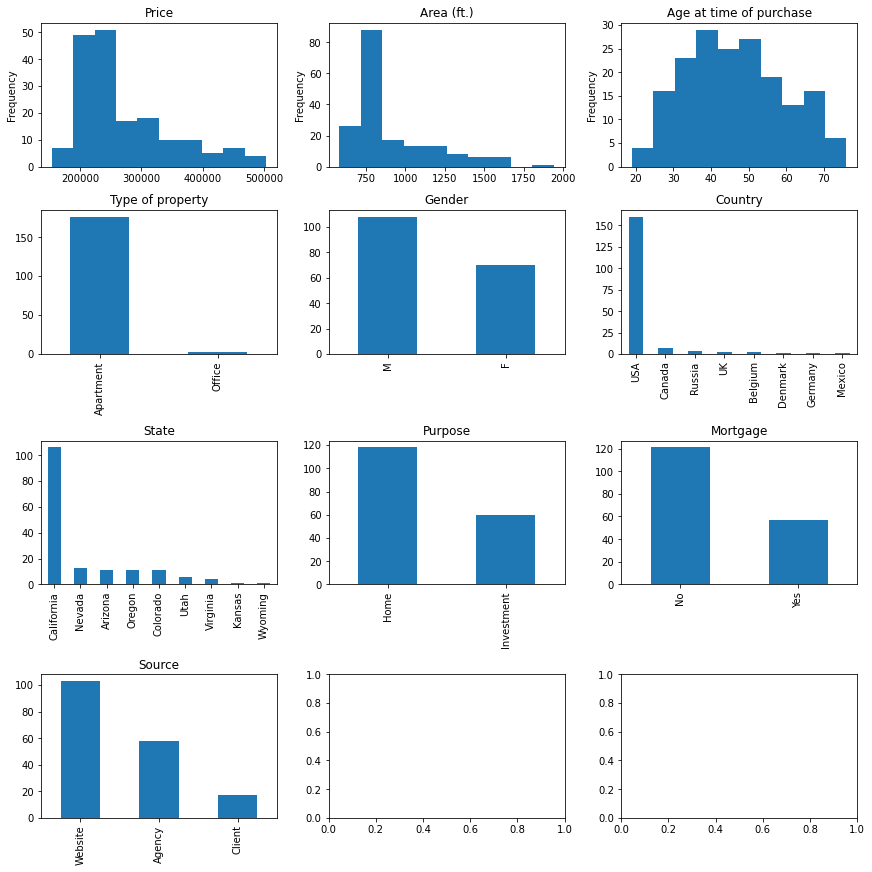

In [192]:
ncols = 3 if len(columns_of_interest)>=3 else len(columns_of_interest)
nrows = len(columns_of_interest) // ncols + (1 if len(columns_of_interest) % ncols else 0)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize = (12,12), constrained_layout=True)
axes = axs.flat
for i, col in enumerate(columns_of_interest):
    if target_df[col].dtype == 'object' or target_df[col].dtype == 'string':
        target_df[col].value_counts().plot.bar(ax = axes[i])
    else:
        target_df[col].plot.hist(ax = axes[i])
    axes[i].set_title(col)